In [24]:
# import numpy as np
import interpreter
import domain
from KMC import KMC2D
import matplotlib.pyplot as plt
import numpy as np

# Definition du substrat
x = 100
y = 50
grid = domain.create_grid(x,y)     # [hauteur, largeur]

liste_kT = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00]
liste_deltamu = np.linspace(-1.0, 1.0, 11)

nb_pas_temps = 100
gif = False

kT = liste_kT[2]
deltamu = liste_deltamu[0]

nb_iterations=10

# interpreter.gamma_dt(parametres[0], (x,y), kT, deltamu)
# interpreter.rugosite_dt(nb_pas_temps, parametres[1], (x,y), kT[0], deltamu[0])


# interpreter.plot_growth_2d(grid, show=True)

In [18]:
liste_moy_gamma_kbt=[]
liste_moy_rugosite_kbt=[]
liste_std_gamma_kbt=[]
liste_std_rugosite_kbt=[]
for param_kbT in liste_kT:
    print(param_kbT)
    liste_gamma=[]
    liste_rugosite=[]
    for b in range(nb_iterations):
        x = 100
        y = 50
        grid = domain.create_grid(x,y)     # [hauteur, largeur]

        grid_f, deltatemps_reel, parametres = KMC2D(grid, param_kbT, deltamu, nb_pas_temps,gamma=True, rugosity=True)

        gamma_iteration=parametres[0][-1]
        liste_gamma.append(gamma_iteration)

        rugosite_iteration=parametres[1][-1]
        liste_rugosite.append(rugosite_iteration)

    gamma_moy_param=np.mean(liste_gamma)
    rugosite_moy_param=np.mean(liste_rugosite)

    gamma_std_param=np.std(liste_gamma)
    rugosite_std_param=np.std(liste_rugosite)

    liste_moy_gamma_kbt.append(gamma_moy_param)
    liste_moy_rugosite_kbt.append(rugosite_moy_param)

    liste_std_gamma_kbt.append(gamma_std_param)
    liste_std_rugosite_kbt.append(rugosite_std_param)



0.5
L'événement est une adsorption au site 56
L'événement est une adsorption au site 38
L'événement est une adsorption au site 45
L'événement est une adsorption au site 43
L'événement est une désorption au site 43
L'événement est une adsorption au site 23
L'événement est une adsorption au site 8
L'événement est une adsorption au site 10
L'événement est une adsorption au site 79
L'événement est une désorption au site 8
L'événement est une adsorption au site 30
L'événement est une désorption au site 40
L'événement est une désorption au site 39
L'événement est une adsorption au site 3
L'événement est une adsorption au site 68
L'événement est une désorption au site 58
L'événement est une désorption au site 56
L'événement est une adsorption au site 12
L'événement est une désorption au site 27
L'événement est une désorption au site 19
L'événement est une adsorption au site 46
L'événement est une désorption au site 19
L'événement est une désorption au site 58
L'événement est une désorption au

In [19]:
liste_gamma_moy_mu=[]
liste_rugosite_moy_mu=[]
liste_gamma_std_mu=[]
liste_rugosite_std_mu=[]
for param_mu in liste_deltamu:
    print(param_mu)
    liste_gamma=[]
    liste_rugosite=[]
    for b in range(nb_iterations):
        x = 20
        y = 50
        grid = domain.create_grid(x,y)     # [hauteur, largeur]

        grid_f, deltatemps_reel, parametres = KMC2D(grid, kT, param_mu, nb_pas_temps,gamma=True, rugosity=True)

        gamma_iteration=parametres[0][-1]
        liste_gamma.append(gamma_iteration)

        rugosite_iteration=parametres[1][-1]
        liste_rugosite.append(rugosite_iteration)

    gamma_moy_param=np.mean(liste_gamma)
    rugosite_moy_param=np.mean(liste_rugosite)

    gamma_std_param=np.std(liste_gamma)
    rugosite_std_param=np.std(liste_rugosite)

    liste_gamma_moy_mu.append(gamma_moy_param)
    liste_rugosite_moy_mu.append(rugosite_moy_param)

    liste_gamma_std_mu.append(gamma_std_param)
    liste_rugosite_std_mu.append(rugosite_std_param)

-1.0
L'événement est une adsorption au site 19
L'événement est une désorption au site 6
L'événement est une désorption au site 6
L'événement est une désorption au site 19
L'événement est une désorption au site 12
L'événement est une désorption au site 12
L'événement est une adsorption au site 10
L'événement est une désorption au site 12
L'événement est une désorption au site 12
L'événement est une désorption au site 12
L'événement est une désorption au site 5
L'événement est une désorption au site 11
L'événement est une désorption au site 5
L'événement est une adsorption au site 6
L'événement est une adsorption au site 5
L'événement est une adsorption au site 15
L'événement est une désorption au site 19
L'événement est une désorption au site 11
L'événement est une adsorption au site 15
L'événement est une adsorption au site 18
L'événement est une désorption au site 9
L'événement est une adsorption au site 16
L'événement est une désorption au site 12
L'événement est une désorption au si

In [20]:
print(liste_rugosite)

[1.5620499351813306, 2.108909670896314, 2.1742814905158903, 1.6613247725836144, 2.233830790368868, 2.014944167960988, 2.132486811213612, 1.851350858157362, 1.5652475842498532, 1.6124515496597103]


C:\Users\laure\AppData\Local\Temp\ipykernel_18708\1153471764.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


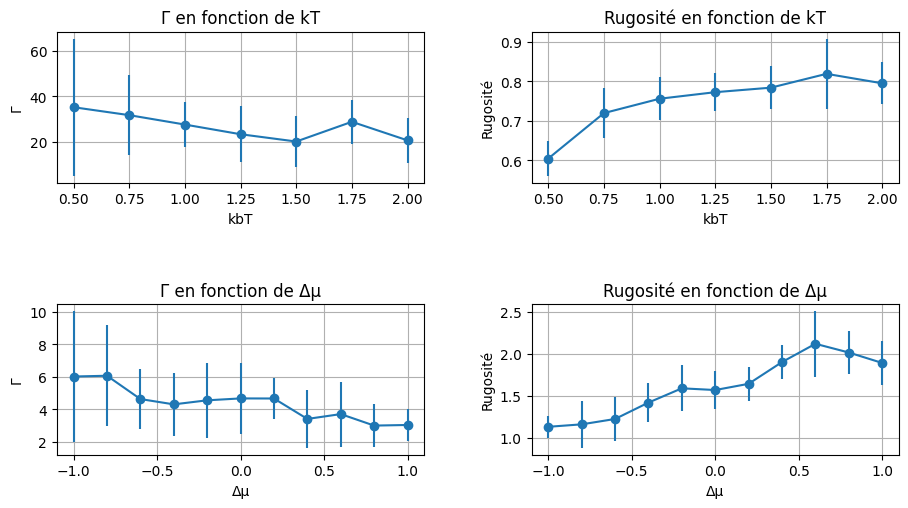

In [21]:
fig,ax=plt.subplots(2,2,figsize=(10,6))
ax[0][0].errorbar(liste_kT,liste_moy_gamma_kbt,liste_std_gamma_kbt,fmt='o')
ax[0][0].plot(liste_kT,liste_moy_gamma_kbt,color='#1f77b4')
ax[0][0].grid()
ax[0][0].set_xlabel('kbT')
ax[0][0].set_ylabel('Γ')
ax[0][0].set_title("Γ en fonction de kT")

ax[0][1].errorbar(liste_kT,liste_moy_rugosite_kbt,liste_std_rugosite_kbt,fmt='o')
ax[0][1].plot(liste_kT,liste_moy_rugosite_kbt,color='#1f77b4')
ax[0][1].grid()
ax[0][1].set_xlabel('kbT')
ax[0][1].set_ylabel('Rugosité')
ax[0][1].set_title("Rugosité en fonction de kT")

ax[1][0].errorbar(liste_deltamu,liste_gamma_moy_mu,liste_gamma_std_mu,fmt='o')
ax[1][0].plot(liste_deltamu,liste_gamma_moy_mu,color='#1f77b4')
ax[1][0].grid()
ax[1][0].set_xlabel('Δμ')
ax[1][0].set_ylabel('Γ')
ax[1][0].set_title("Γ en fonction de Δμ")

ax[1][1].errorbar(liste_deltamu,liste_rugosite_moy_mu,liste_rugosite_std_mu,fmt='o')
ax[1][1].plot(liste_deltamu,liste_rugosite_moy_mu,color='#1f77b4')
ax[1][1].grid()
ax[1][1].set_xlabel('Δμ')
ax[1][1].set_ylabel('Rugosité')
ax[1][1].set_title("Rugosité en fonction de Δμ")
fig.tight_layout(pad=4.0) 
fig.show()

In [31]:
x=20
y=50
hauteur_substrat=10
grid = domain.create_grid(x,y,hauteur_substrat)
interpreter.save_graph(grid,0,0)
a,b,c=KMC2D(grid,liste_kT[0],liste_deltamu[0],nb_pas_temps,True,True,True)

L'événement est une désorption au site 1
L'événement est une désorption au site 2
L'événement est une adsorption au site 19
L'événement est une désorption au site 19
L'événement est une adsorption au site 4
L'événement est une adsorption au site 9
L'événement est une adsorption au site 5
L'événement est une désorption au site 4
L'événement est une désorption au site 5
L'événement est une désorption au site 14
L'événement est une désorption au site 4
L'événement est une adsorption au site 7
L'événement est une désorption au site 3
L'événement est une adsorption au site 1
L'événement est une adsorption au site 19
L'événement est une désorption au site 9
L'événement est une désorption au site 5
L'événement est une désorption au site 7
L'événement est une adsorption au site 19
L'événement est une adsorption au site 2
L'événement est une adsorption au site 1
L'événement est une désorption au site 6
L'événement est une désorption au site 1
L'événement est une désorption au site 11
L'événemen

GIF enregistré dans : frames\evolution.gif


ValueError: x and y must have same first dimension, but have shapes (300,) and (100,)

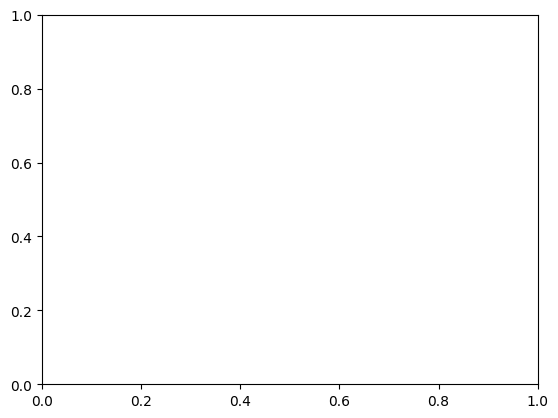

In [32]:
interpreter.creer_gif("frames",fps=20)
axe_x=[i for i in range(300)]
fig,ax=plt.subplots()
ax.plot(axe_x,c[0])
ax.grid()
ax.set_xlabel("Itération",fontsize=16)
ax.set_ylabel("Γ",fontsize=16)
fig.show()

fig,ax=plt.subplots()
ax.plot(axe_x,c[1])
ax.set_xlabel("Itération",fontsize=16)
ax.set_ylabel("Rugosité",fontsize=16)
ax.grid()
fig.show()
